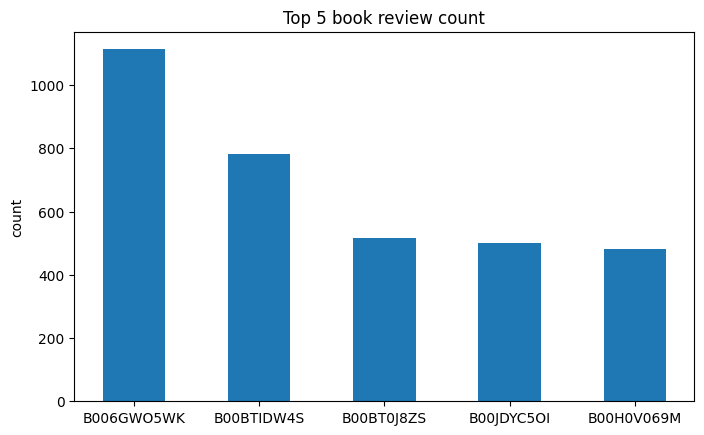

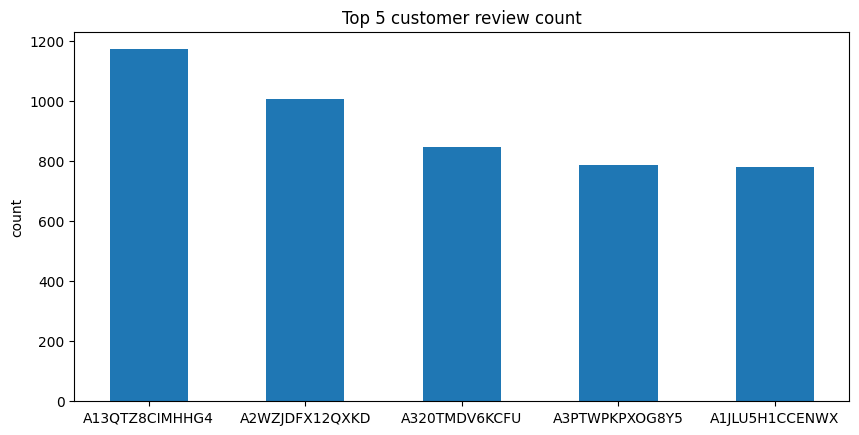

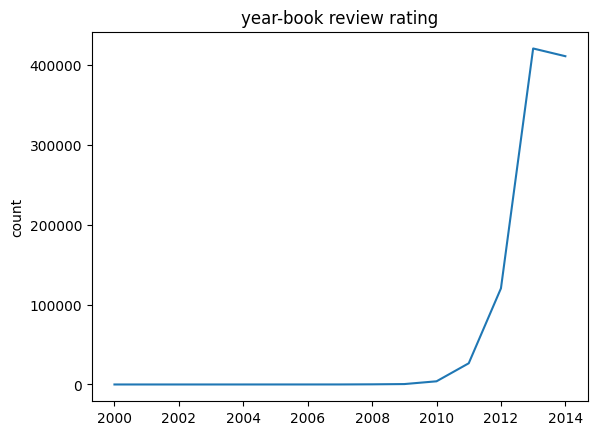

In [37]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text, func
from sqlalchemy.orm import Session
from sqlalchemy import Column
from sqlalchemy import create_engine
from sqlalchemy import String, Text, Date, DateTime, Integer
from sqlalchemy import ForeignKey
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import Mapped
from sqlalchemy import text
from datetime import datetime


Base = declarative_base()

# max length of asin is 10
# max length of reviewText is 23037
# max length of reviewerID is 21
# max length of reviewerName is 49
# max length of summary is 325


class Customer(Base):
    __tablename__ = 'customer'
    id = Column(String(30), primary_key=True)
    name = Column(String(100))

    def __repr__(self) -> str:
        return f'id:{self.id},name:{self.name}'


class Book(Base):
    __tablename__ = 'book'
    id = Column(String(10), primary_key=True)

    def __repr__(self) -> str:
        return f'id:{self.id}'


class Review(Base):
    __tablename__ = 'review'
    customer_id = Column(ForeignKey('customer.id'), primary_key=True)
    book_id = Column(ForeignKey('book.id'), primary_key=True)
    review_text = Column(Text)
    review_time = Column(Date)
    helpful = Column(Integer)
    not_helpful = Column(Integer)
    summary = Column(Text)
    unix_time_stamp = Column(DateTime)

    def __repr__(self) -> str:
        return f'customer_id:{self.customer_id}, book_id:{self.book_id}, text:{self.review_text}, date:{self.review_time}, timestamp:{self.unix_time_stamp}'


username = ''
password = ''
host = ''
port =''
my_db = 'AmazonBookReview'
database_url = f'mysql+pymysql://{username}:{password}@{host}:{port}/{my_db}'
engine = create_engine(database_url)

with engine.connect() as conn:
    sql = '''SELECT book_id, COUNT(book_id) AS count 
    FROM review
    GROUP BY book_id
    ORDER BY count DESC
    LIMIT 5;
    '''
    book_rating = conn.execute(text(sql)).fetchall()

    sql = '''SELECT customer_id, COUNT(customer_id) AS count
    FROM review
    GROUP BY customer_id
    ORDER BY count DESC
    LIMIT 5;
    '''
    customer_rating = conn.execute(text(sql)).fetchall()

    sql = '''SELECT YEAR(review_time), COUNT(1)
    FROM review
    GROUP BY YEAR(review_time)
    ORDER BY YEAR(review_time);
    '''
    review_year_rating = conn.execute(text(sql)).fetchall()


books, counts = list(), list()
for row in book_rating:
    books.append(row[0])
    counts.append(row[1])

customers, customer_counts = list(), list()
for row in customer_rating:
    customers.append(row[0])
    customer_counts.append(row[1])

years, year_counts = list(),list()
for row in review_year_rating:
    years.append(row[0])
    year_counts.append(row[1])



fig, ax1 = plt.subplots()
ax1.bar(books, counts, width=0.5)
ax1.set_ylabel('count')
ax1.set_title('Top 5 book review count')
fig.set_figwidth(8)

fig2, ax2 = plt.subplots()
ax2.bar(customers, customer_counts, width=0.5)
ax2.set_ylabel('count')
ax2.set_title('Top 5 customer review count')
fig2.set_figwidth(10)
plt.show()

fig3, ax3 = plt.subplots()
ax3.plot(years, year_counts)
ax3.set_ylabel('count')
ax3.set_title('year-book review rating')
fig2.set_figwidth(10)
plt.show()



